In [42]:
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

import matplotlib.pyplot as plt

In [43]:
# Leemos el csv que contiene las reviews procesadas.
df = pd.read_csv("amazon/CleanReviews.csv", sep=",")

In [44]:
# Eliminamos los posibles varoles nulos que podamos tener el dataframe.
df.dropna(inplace=True)

In [45]:
df.head()

Unnamed: 0                                            reviews  sentiment
0           0  daughter want book price amazon well try recip...          5
1           1  buy zoku quick pop daughterr zoku quick maker ...          5
2           2  shortage pop recipe available free web purchas...          4
3           3  book zoku highly recommend large variety recip...          5
4           4  cookbook great enjoy review recipe sure diffic...          4

In [46]:
def label_sentiment(row):
    if int(row['sentiment']) < 3:
        return 'neg'
    else:
        return 'pos'

In [47]:
df['sentiment_label'] = df.apply(lambda row: label_sentiment(row), axis=1)

In [48]:
df.head()

Unnamed: 0                                            reviews  sentiment  \
0           0  daughter want book price amazon well try recip...          5   
1           1  buy zoku quick pop daughterr zoku quick maker ...          5   
2           2  shortage pop recipe available free web purchas...          4   
3           3  book zoku highly recommend large variety recip...          5   
4           4  cookbook great enjoy review recipe sure diffic...          4   

  sentiment_label  
0             pos  
1             pos  
2             pos  
3             pos  
4             pos

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    df['reviews'],
    df['sentiment_label'],
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [31]:
X_train.iloc[:10]

23868    wow description thing justice sturdy heady dut...
11       beautifully illustrate book feature colorful g...
45681    couldn t believe fit pot small box solid polis...
10719    thing time lol collect watch don t rush lolwe ...
33871    perspective retire ceo previously deme google ...
3648     great little strainer serve purpose especially...
10454    like look size shape feel design s good press ...
41968    stable tower look nice rec room hold dvd s tit...
3816     deep abide love oxo good grip item exception h...
4526     eight thousand, two hundred and twenty oxo goo...
Name: reviews, dtype: object

In [51]:
y_train.iloc[:10]

23868    pos
11       pos
45681    pos
10719    pos
33871    pos
3648     pos
10454    pos
41968    pos
3816     pos
4526     pos
Name: sentiment_label, dtype: object

In [52]:
# Extracción de features
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(2, 3)
)
cv.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=2500,
                min_df=5, ngram_range=(2, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='ascii',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [53]:
print(list(cv.vocabulary_.items())[:20])

[('great addition', 841), ('buy second', 180), ('couldn believe', 354), ('heat fast', 970), ('product great', 1682), ('piece cookware', 1587), ('cookware set', 349), ('set look', 1824), ('look brand', 1262), ('brand new', 120), ('look brand new', 1263), ('set timer', 1829), ('ease use', 497), ('kitchen counter', 1083), ('go try', 783), ('work right', 2452), ('send new', 1812), ('kitchenaid stand', 1097), ('stand mixer', 1926), ('great job', 859)]


In [54]:
## TF-IDF scores del training set y test set
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

In [ ]:
transformer = Normalizer().fit(X_train_cv_simple)
X_train_cv_simple = transformer.transform(X_train_cv_simple)
X_test_cv_simple = transformer.transform(X_test_cv_simple)

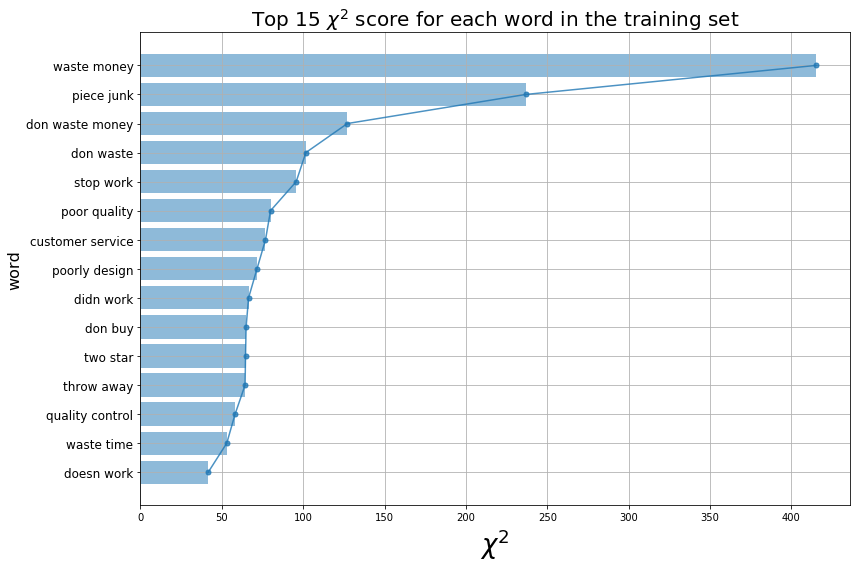

In [55]:
# Compute the chi-squared score for each word in the training set and show the values
i = 15

chi2score = chi2(X_train_, y_train)[0]
scores = list(zip(cv.get_feature_names(), chi2score))
sorted_scores = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*sorted_scores[-i:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(12, 8))
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid()
plt.tight_layout()
plt.show();

In [57]:
# Entrenamiento
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=100000)
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.9064500640204866
Accuracy for C=0.05: 0.9064500640204866
Accuracy for C=0.25: 0.9098911651728553
Accuracy for C=0.5: 0.9114916773367477
Accuracy for C=1: 0.9134122919334187
Accuracy for C=10: 0.9120518565941101
Accuracy for C=100: 0.9085307298335468
Accuracy for C=1000: 0.9068501920614597
Accuracy for C=10000: 0.9062900128040973


In [58]:
# Métricas
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[  310   859]
 [  312 11015]]

Classification report:
              precision    recall  f1-score   support

         neg       0.50      0.27      0.35      1169
         pos       0.93      0.97      0.95     11327

    accuracy                           0.91     12496
   macro avg       0.71      0.62      0.65     12496
weighted avg       0.89      0.91      0.89     12496

Accuracy score:0.9062900128040973


In [59]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[  310   859]
 [  312 11015]]

Classification report:
              precision    recall  f1-score   support

         neg       0.50      0.27      0.35      1169
         pos       0.93      0.97      0.95     11327

    accuracy                           0.91     12496
   macro avg       0.71      0.62      0.65     12496
weighted avg       0.89      0.91      0.89     12496

Accuracy score:0.9062900128040973


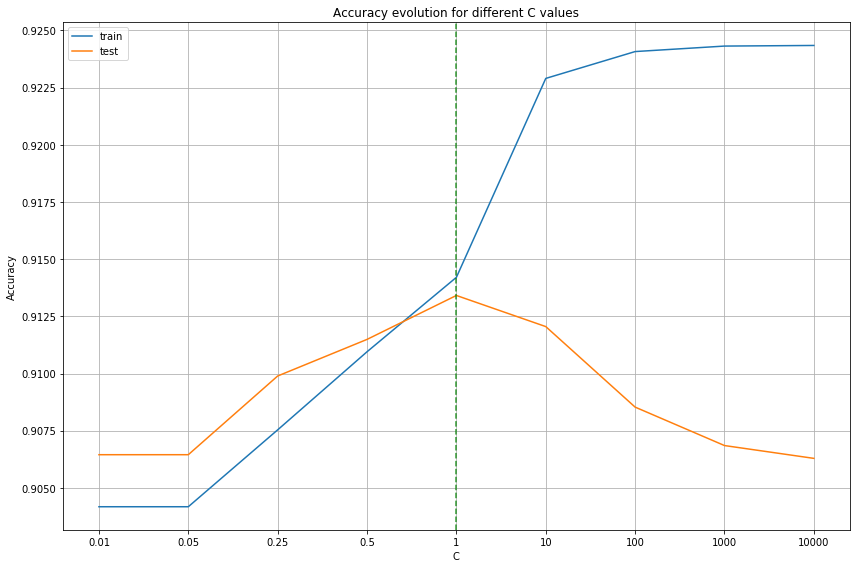

In [63]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

In [69]:
# Predict function
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['sentiment_label']))
    r = df.iloc[review_index]['reviews']
    print('Prediction: {}'.format(lr.predict(cv.transform([r]))))

In [67]:
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)


Review no. 23261
Actual sentiment: pos
Prediction: ['pos']

Review no. 27885
Actual sentiment: pos
Prediction: ['pos']

Review no. 3196
Actual sentiment: pos
Prediction: ['pos']

Review no. 22392
Actual sentiment: pos
Prediction: ['pos']

Review no. 495
Actual sentiment: pos
Prediction: ['pos']
